In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("Letter-Recognition.csv")

In [3]:
df

,Letter,X_horizontal,Y_vertical,Width,Height,Onpix,X-bar,Y-bar,X2bar,Y2bar,XYbar,X2Ybar,XY2bar,X-edge,XegvY,Y-edge,YegvX
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### 資料前處理

In [4]:
df_drop = df.dropna()

label_map = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}
df_drop['Class'] = df_drop['Letter'].map(label_map)
data_le = df_drop

print(data_le)
data_le1 = data_le.drop(labels=['Letter'],axis=1).values
print("Check missin data(NAN mount):", len(np.where(np.isnan(data_le1))[0]))

#引用來源 https://www.youtube.com/watch?v=1epy1EKVDkc

      Letter  X_horizontal  Y_vertical  Width  Height  Onpix  X-bar  Y-bar  \
0          T             2           8      3       5      1      8     13   
1          I             5          12      3       7      2     10      5   
2          D             4          11      6       8      6     10      6   
3          N             7          11      6       6      3      5      9   
4          G             2           1      3       1      1      8      6   
...      ...           ...         ...    ...     ...    ...    ...    ...   
19995      D             2           2      3       3      2      7      7   
19996      C             7          10      8       8      4      4      8   
19997      T             6           9      6       7      5      6     11   
19998      S             2           3      4       2      1      8      7   
19999      A             4           9      6       6      2      9      5   

       X2bar  Y2bar  XYbar  X2Ybar  XY2bar  X-edge  XegvY  Y-ed

### MinMax正規化

In [5]:
y = data_le['Class'].values
df1= data_le.drop(labels=['Letter','Class'],axis=1)
scaler = MinMaxScaler(feature_range=(0,1)).fit(df1)
x = scaler.transform(df1)

print('資料集 df1 的平均值:\n',df1.values.mean(axis=0))
print('資料集 df1 的標準差:\n',df1.values.std(axis=0))

print('標準化後 資料集 df1 的平均值:\n', x.mean(axis=0))
print('標準化後 資料集 df1 的標準差:\n', x.std(axis=0))

#引用來源 https://www.youtube.com/watch?v=P42GqxCXkY8

資料集 df1 的平均值:
 [4.02355 7.0355  5.12185 5.37245 3.50585 6.8976  7.50045 4.6286  5.17865
 8.28205 6.454   7.929   3.0461  8.33885 3.69175 7.8012 ]
資料集 df1 的標準差:
 [1.91316371 3.30447269 2.01452292 2.2613339  2.19040311 2.02598476
 2.32529564 2.69990038 2.38076336 2.48841271 2.63100437 2.08056699
 2.33248254 1.54668377 2.56700836 1.61742962]
標準化後 資料集 df1 的平均值:
 [0.26823667 0.46903333 0.34145667 0.35816333 0.23372333 0.45984
 0.50003    0.30857333 0.34524333 0.55213667 0.43026667 0.5286
 0.20307333 0.55592333 0.24611667 0.52008   ]
標準化後 資料集 df1 的標準差:
 [0.12754425 0.22029818 0.13430153 0.15075559 0.14602687 0.13506565
 0.15501971 0.17999336 0.15871756 0.16589418 0.17540029 0.13870447
 0.15549884 0.10311225 0.17113389 0.10782864]


### 拆分訓練集&測試集

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#Data拆80% & 20%至Training & Testing

### RandomForest迴歸器

In [7]:
randomForestModel_check = RandomForestRegressor(n_estimators=100, criterion='squared_error')
randomForestModel_check.fit(x_train,y_train)
predicted_check = randomForestModel_check.predict(x_test)

mae = '%.4f'%metrics.mean_absolute_error(y_test, predicted_check)
mape = '%.4f'%metrics.mean_absolute_percentage_error(y_test, predicted_check)
rmse = '%.4f'%metrics.mean_squared_error(y_test, predicted_check, squared=False)

print('MAE=', mae, '  MAPE=', mape, '  RSME=', rmse)

MAE= 1.1281   MAPE= 0.1852   RSME= 2.3586


### 特徵重要性

Feature: 0, Score: 0.0190
Feature: 1, Score: 0.0174
Feature: 2, Score: 0.0100
Feature: 3, Score: 0.0136
Feature: 4, Score: 0.0169
Feature: 5, Score: 0.0378
Feature: 6, Score: 0.0254
Feature: 7, Score: 0.0846
Feature: 8, Score: 0.1528
Feature: 9, Score: 0.0473
Feature: 10, Score: 0.1697
Feature: 11, Score: 0.1159
Feature: 12, Score: 0.0709
Feature: 13, Score: 0.0815
Feature: 14, Score: 0.0898
Feature: 15, Score: 0.0474


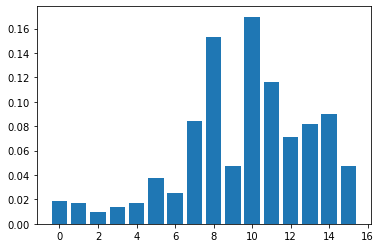

特徵最大值: 0.1697 ,特徵名稱為 X2Ybar
特徵最小值: 0.0100 ,特徵名稱為 Width


In [8]:
importance = randomForestModel_check.feature_importances_
list_randomforestimportance = []

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.4f' % (i,v))
    list_randomforestimportance.append(v)

plt.bar([x for x in range(len(importance))], importance)
plt.show()

print("特徵最大值:",'%.4f'%max(list_randomforestimportance),",特徵名稱為",df1.columns[list_randomforestimportance.index(max(list_randomforestimportance))])
print("特徵最小值:",'%.4f'%min(list_randomforestimportance),",特徵名稱為",df1.columns[list_randomforestimportance.index(min(list_randomforestimportance))])

### 特徵重要性篩選(最大3個/最小3個刪除)

In [9]:
y_rf001 = data_le['Class'].values
df_rf001= data_le.drop(labels=['Letter','Class','X2Ybar','Y2bar','XY2bar'],axis=1)
scaler_rf001 = MinMaxScaler(feature_range=(0,1)).fit(df_rf001)
x_rf001 = scaler_rf001.transform(df_rf001)

y_rf002 = data_le['Class'].values
df_rf002= data_le.drop(labels=['Letter','Class','Width','Height','Onpix'],axis=1)
scaler_rf002 = MinMaxScaler(feature_range=(0,1)).fit(df_rf002)
x_rf002 = scaler_rf002.transform(df_rf002)

In [10]:
x_train001,x_test001,y_train001,y_test001 = train_test_split(x_rf001,y_rf001,test_size=0.2, random_state=42)
x_train002,x_test002,y_train002,y_test002 = train_test_split(x_rf002,y_rf002,test_size=0.2, random_state=42)

randomForestModel001 = RandomForestRegressor(n_estimators=100, criterion='squared_error')
randomForestModel001.fit(x_train001,y_train001)
predicted001 = randomForestModel001.predict(x_test001)

mae001 = '%.4f'%metrics.mean_absolute_error(y_test001, predicted001)
mape001 = '%.4f'%metrics.mean_absolute_percentage_error(y_test001, predicted001)
rmse001 = '%.4f'%metrics.mean_squared_error(y_test001, predicted001, squared=False)

print('刪除特徵最大值後  MAE=', mae001, '  MAPE=', mape001, '  RSME=', rmse001)

randomForestModel002 = RandomForestRegressor(n_estimators=100, criterion='squared_error')
randomForestModel002.fit(x_train002,y_train002)
predicted002 = randomForestModel002.predict(x_test002)

mae002 = '%.4f'%metrics.mean_absolute_error(y_test002, predicted002)
mape002 = '%.4f'%metrics.mean_absolute_percentage_error(y_test002, predicted002)
rmse002 = '%.4f'%metrics.mean_squared_error(y_test002, predicted002, squared=False)

print('刪除特徵最小值後  MAE=', mae002, '  MAPE=', mape002, '  RSME=', rmse002)

刪除特徵最大值後  MAE= 1.5657   MAPE= 0.2845   RSME= 3.0390
刪除特徵最小值後  MAE= 1.0956   MAPE= 0.1809   RSME= 2.3416


In [11]:
rfcomparison = {
    "資料狀態":["原始預測數值","刪除特徵最大","刪除特徵最小"],
    "MAE":[mae,mae001,mae002],
    "MAPE":[mape,mape001,mape002],
    "RMSE":[rmse,rmse001,rmse002]}
df_rfcomparison = pd.DataFrame(rfcomparison)
print(df_rfcomparison)

     資料狀態     MAE    MAPE    RMSE
0  原始預測數值  1.1281  0.1852  2.3586
1  刪除特徵最大  1.5657  0.2845  3.0390
2  刪除特徵最小  1.0956  0.1809  2.3416
